# Decision Tree from Sklearn

In [19]:
import numpy as np
import pandas as pd
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
diabetes = pd.read_csv("diabetes-dataset.csv")

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
dt = DecisionTreeClassifier()

In [6]:
#Use below encoder if data has categorical featuers which need to be converted to numeric values
'''
ord_enc = OrdinalEncoder()
data = ord_enc.fit_transform(y_at[["Outlook","Temperature", "Humidity", "Wind"]])
data
'''

'\nord_enc = OrdinalEncoder()\ndata = ord_enc.fit_transform(y_at[["Outlook","Temperature", "Humidity", "Wind"]])\ndata\n'

In [7]:
#out = ord_enc.fit_transform(y)

In [20]:
features = [x for x in diabetes.keys()[:-1]]
inp = diabetes
train, test = train_test_split(inp, test_size=0.2,shuffle = True)

In [21]:
X_train = train[features]
y_train = train["Outcome"]
X_test = test[features]
y_test = test["Outcome"]

In [22]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

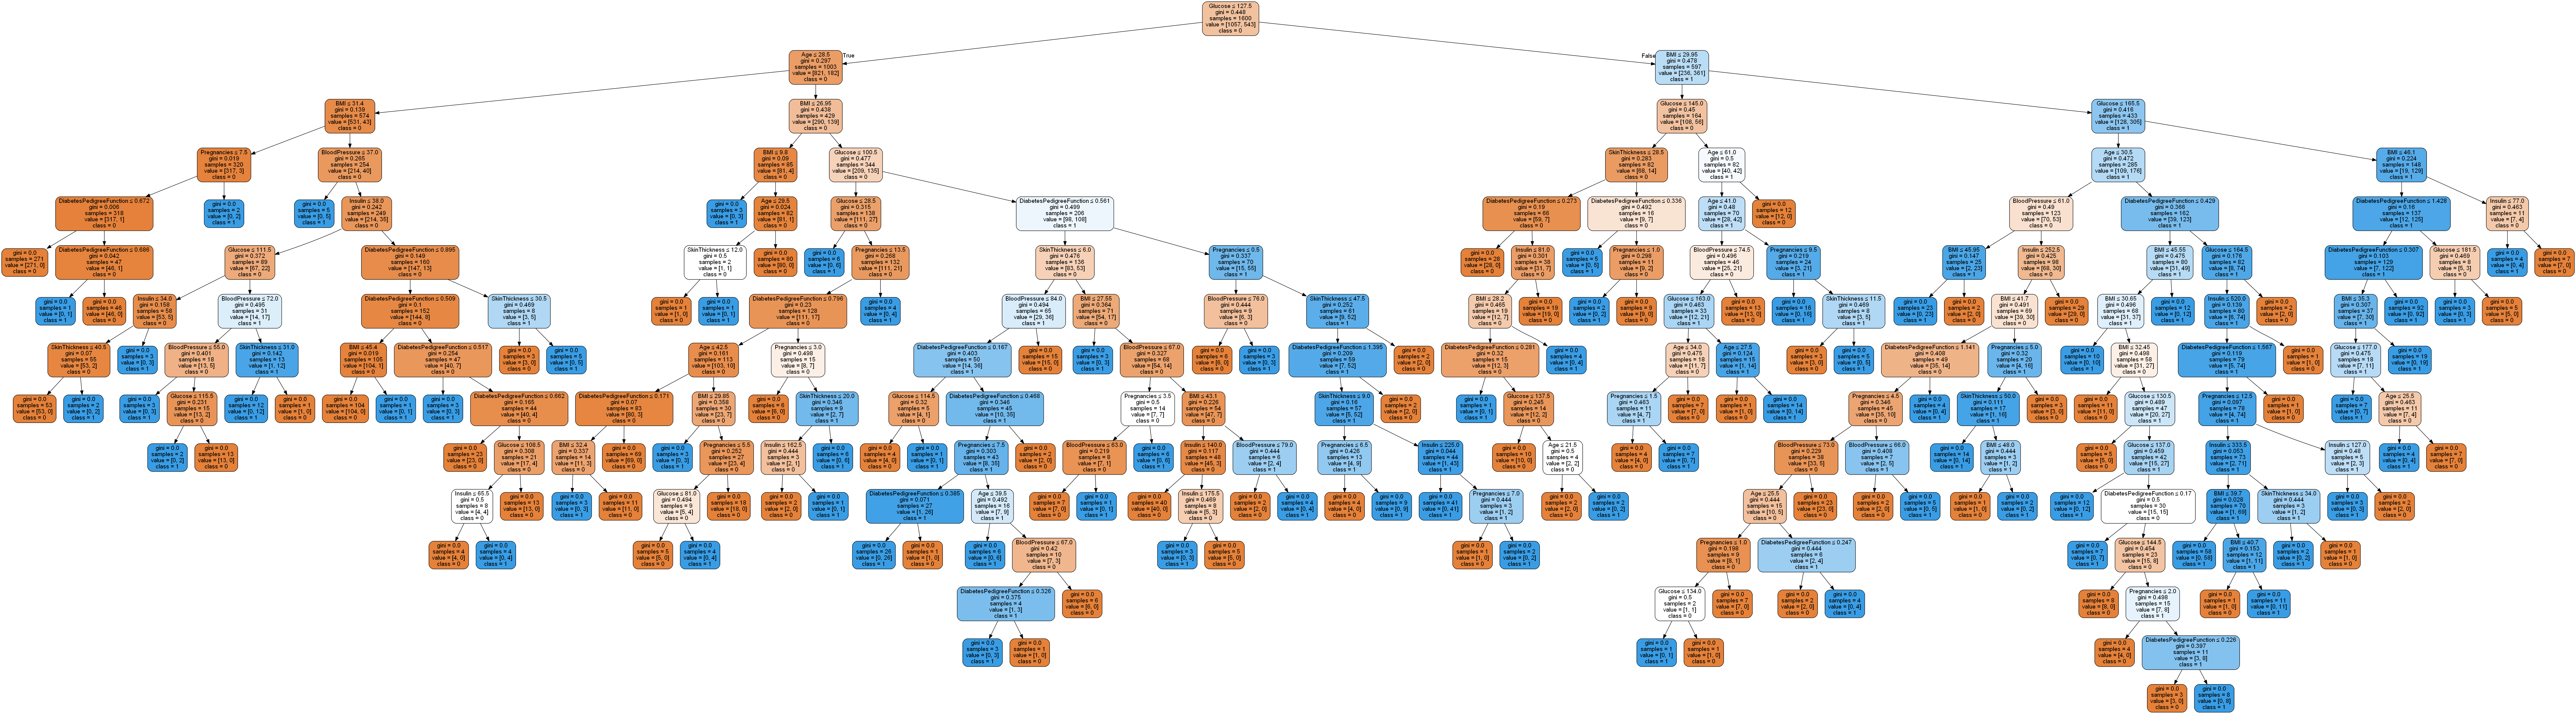

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image, display
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

display(Image(graph.create_png()))

In [25]:
 preds = dt.predict(X_test)

In [28]:
true = 0
for i in range(len(y_test)):
    if preds[i] == np.array(y_test)[i]:
        true += 1
        
print("Accuracy =",(true/len(y_test))*100,"%")

Accuracy = 99.5 %


## Helper functions for decision tree.
These functions calculate entropy and Information gain which are used in the ID3 algorithm

def entropy(y):
    out = np.array(y)
    ent = 0
    for val in np.unique(out):
        temp = -(len(out[out == val])/len(y))*(np.log2(len(out[out == val])/len(y)))
        ent += temp
    return ent
def get_IG(y,att_y):
    att_y.columns = range(att_y.shape[1])
    temp_ig = 0
    
    for att in att_y[0].unique():
        
        temp_df = att_y[att_y[0] == att]
        H_x = entropy(temp_df[1])
        p_s = len(temp_df)/len(att_y)
        temp_ig += ((p_s*H_x))
        
    return entropy(y)-temp_ig

def get_top_node(data,y):
    temp_df = pd.concat([data,y],axis = 1)
    temp_IGs = []
    for att in data.keys():
        single_df = temp_df[[att,y.keys()[0]]]
        IG = get_IG(y,single_df)
        temp_IGs.append((att, IG))
    
    return sorted(temp_IGs, key = itemgetter(1), reverse = True)[0]